# 1. 개요

-분석의 목적: 실제 문제 해결에 필요한 데이터 분석 및 모델링 기법을 정확히 배우는 것입니다. 이를 통해 참가자들은 데이터 과학자나 머신러닝 엔지니어로서 필요한 핵심 역량을 갖추게 됩니다. 이러한 학습 경험은 참가자들이 머신러닝 대회에서 좋은 성적을 내거나 취업 시장에서 경쟁력을 가질 수 있도록 도와줍니다.

-문제 설명: 이 프로젝트는 인구 통계학적 정보(교육 수준, 결혼 상태 등)와 일반적인 생활 습관(주당 근무 시간 등) 등 다양한 특성들을 바탕으로 소득 수준 예측하는 문제에 대해 다룹니다. 이를 통해 실제 데이터와 타겟 변수 간의 관계를 분석하고 최적의 모델 선택 및 성능 평가 방법에 대해 배울 수 있습니다. 예를 들어, 교육 수준이나 근로 시간이 소득에 어떤 영향을 미치는지를 분석하고, 이를 바탕으로 소득을 예측하는 모델을 구축할 수 있습니다. 이러한 분석은 실제로 정책 결정이나 비즈니스 전략 수립 등에 활용될 수 있습니다.

# 2. 데이터 수집

-데이터 출처: https://dacon.io/competitions/official/236230/data

-수집 방법: 대회에서 제공한 데이터를 사용하여 분석 수행한 것으로 해당 데이터는 대회 주최측이 데이터를 수집하고 제공하였습니다.

-수집된 데이터의 구조 및 특성 설명: 해당 데이터의 구조와 특징은 아래와 같습니다.

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
!pip install lightgbm

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [128]:
train = pd.read_csv('/content/drive/MyDrive/24 데공/소득예측/open (1)/open/train.csv')
test = pd.read_csv('/content/drive/MyDrive/24 데공/소득예측/open (1)/open/test.csv')

In [129]:
display(train.head(3))
display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [131]:
train.isnull().sum()
#train데이터에서는 결측값이 존재하지 않는다.

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [132]:
test.isnull().sum()
#test데이터에서는 1개 결측값을 보인다.

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [133]:
train.shape

(20000, 23)

In [134]:
test.shape

(10000, 22)

In [135]:
# train에서는 결측값이 없고 test데이터 또한 결측값은 1개 뿐이기 때문에결측치 처리는 큰 논점이 아닌듯 싶습니다.
# 이산형 변수가 매우 많아 이들을 전처리하는 과정이 매우 중요할 것으로 보입니다.
# train데이터는 20000,23개이고 test데이터에는 10000,22로 Y값인 income값이 없는 모습입니다.

# 3. 데이터 전처리

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [137]:
train_int = train[train.describe().columns]
# 이산형 변수 추출
train_str = train[train.columns.difference(train.describe().columns)]
# 연속형 변수 추출
train_int.head()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
0,63,4,0,0,0,425
1,37,52,0,0,0,0
2,58,52,3411,0,0,860
3,44,52,0,0,0,850
4,37,52,0,0,0,570


### Gains 특정 이상치 제거

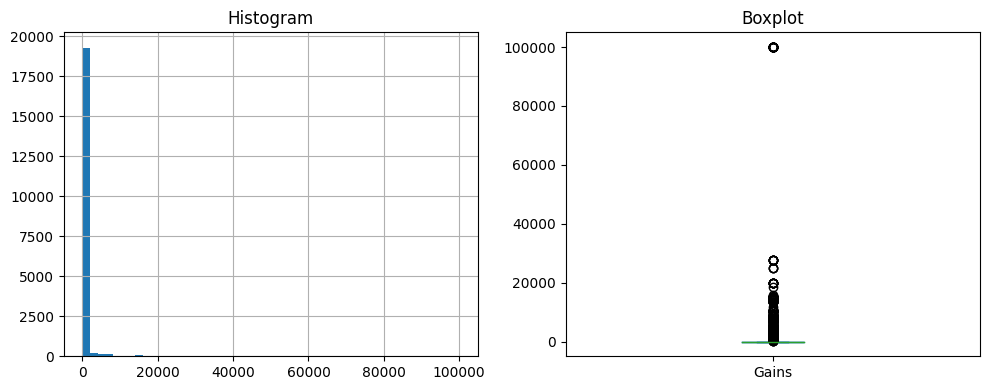

In [138]:
# 제거하기 전 Gains
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [139]:
train['Gains'].describe()

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

In [140]:
# 99999이상의 값을 제거
train = train[train['Gains'] < 99999 ]

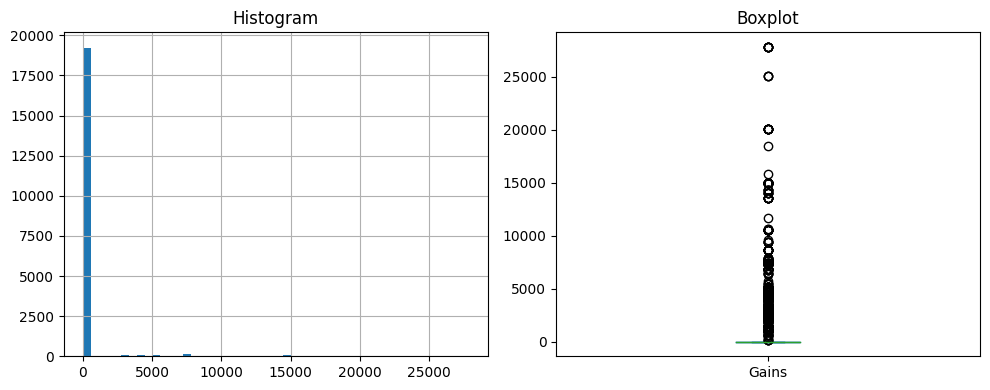

In [141]:
#제거한 후 Gains 확인
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19970 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      19970 non-null  object
 1   Age                     19970 non-null  int64 
 2   Gender                  19970 non-null  object
 3   Education_Status        19970 non-null  object
 4   Employment_Status       19970 non-null  object
 5   Working_Week (Yearly)   19970 non-null  int64 
 6   Industry_Status         19970 non-null  object
 7   Occupation_Status       19970 non-null  object
 8   Race                    19970 non-null  object
 9   Hispanic_Origin         19970 non-null  object
 10  Martial_Status          19970 non-null  object
 11  Household_Status        19970 non-null  object
 12  Household_Summary       19970 non-null  object
 13  Citizenship             19970 non-null  object
 14  Birth_Country           19970 non-null  object
 15  Birth_C

#Losses 이상치 제거

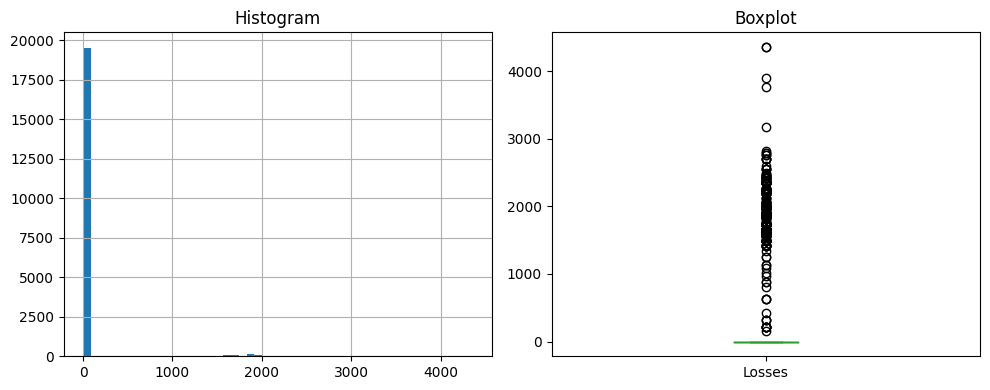

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [144]:
train['Losses'].describe()

count    19970.000000
mean        40.262544
std        279.387958
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Losses, dtype: float64

In [145]:
train = train[train['Losses'] < 3000 ]

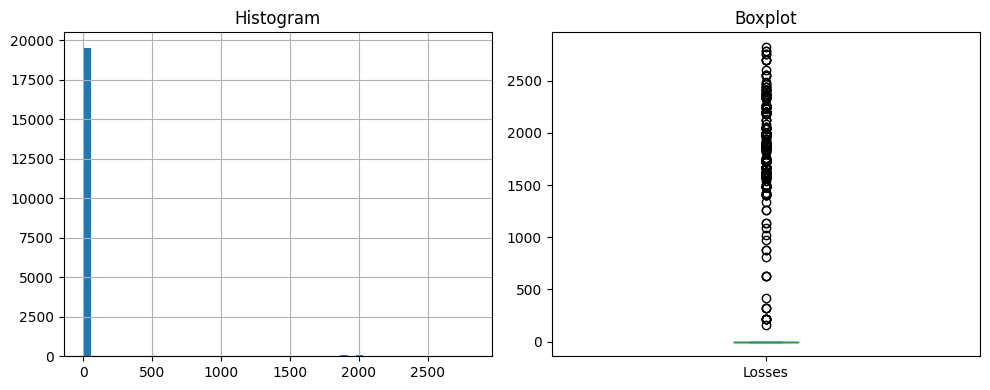

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19965 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      19965 non-null  object
 1   Age                     19965 non-null  int64 
 2   Gender                  19965 non-null  object
 3   Education_Status        19965 non-null  object
 4   Employment_Status       19965 non-null  object
 5   Working_Week (Yearly)   19965 non-null  int64 
 6   Industry_Status         19965 non-null  object
 7   Occupation_Status       19965 non-null  object
 8   Race                    19965 non-null  object
 9   Hispanic_Origin         19965 non-null  object
 10  Martial_Status          19965 non-null  object
 11  Household_Status        19965 non-null  object
 12  Household_Summary       19965 non-null  object
 13  Citizenship             19965 non-null  object
 14  Birth_Country           19965 non-null  object
 15  Birth_C

# Income 특정 이상치 제거

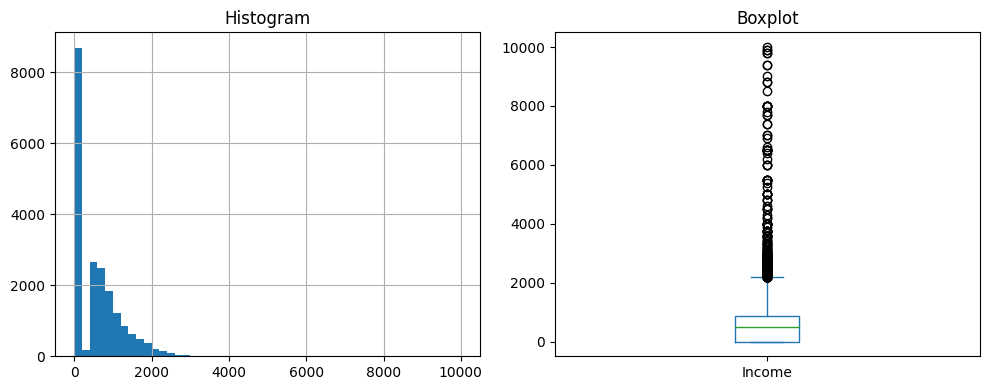

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [149]:
train['Income'].describe()

count    19965.000000
mean       554.898573
std        701.611852
min          0.000000
25%          0.000000
50%        500.000000
75%        875.000000
max       9999.000000
Name: Income, dtype: float64

In [150]:
train.loc[train['Income'] >= 2500, 'Income'] = 2500

In [175]:
train['Income'].describe()

count    19941.000000
mean       538.836768
std        602.854719
min          0.000000
25%          0.000000
50%        500.000000
75%        875.000000
max       2500.000000
Name: Income, dtype: float64

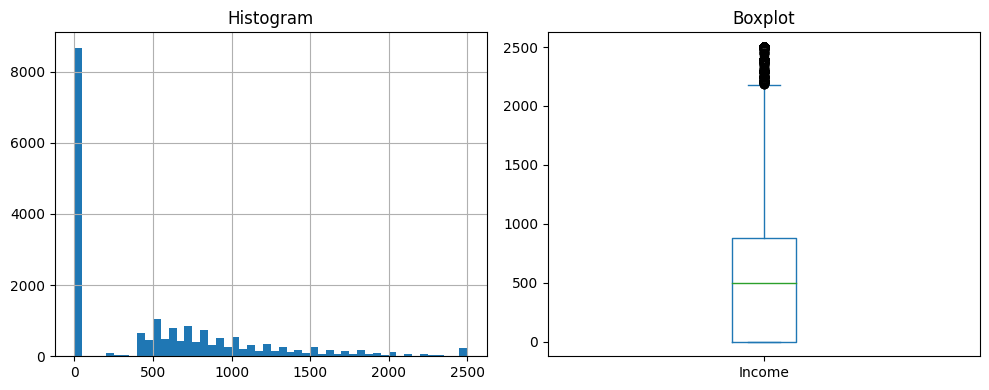

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19965 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      19965 non-null  object
 1   Age                     19965 non-null  int64 
 2   Gender                  19965 non-null  object
 3   Education_Status        19965 non-null  object
 4   Employment_Status       19965 non-null  object
 5   Working_Week (Yearly)   19965 non-null  int64 
 6   Industry_Status         19965 non-null  object
 7   Occupation_Status       19965 non-null  object
 8   Race                    19965 non-null  object
 9   Hispanic_Origin         19965 non-null  object
 10  Martial_Status          19965 non-null  object
 11  Household_Status        19965 non-null  object
 12  Household_Summary       19965 non-null  object
 13  Citizenship             19965 non-null  object
 14  Birth_Country           19965 non-null  object
 15  Birth_C

#Dividends 이상치제거


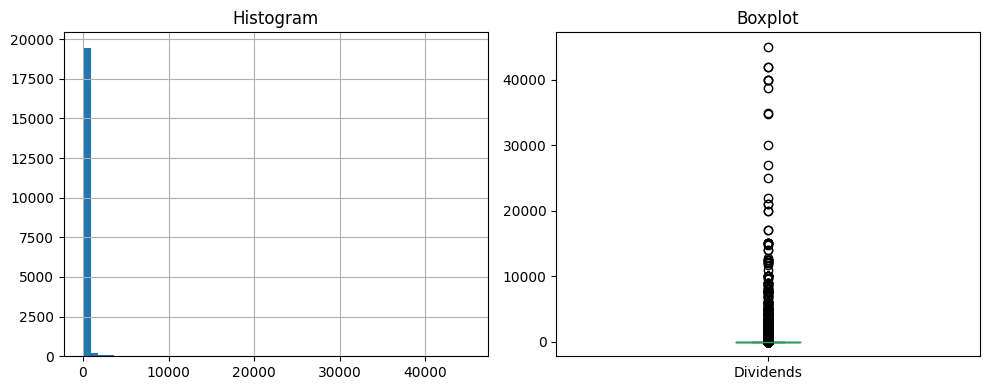

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [154]:
train['Dividends'].describe()

count    19965.000000
mean       121.319209
std       1192.657494
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45000.000000
Name: Dividends, dtype: float64

In [155]:
train = train[train['Dividends'] < 15000 ]

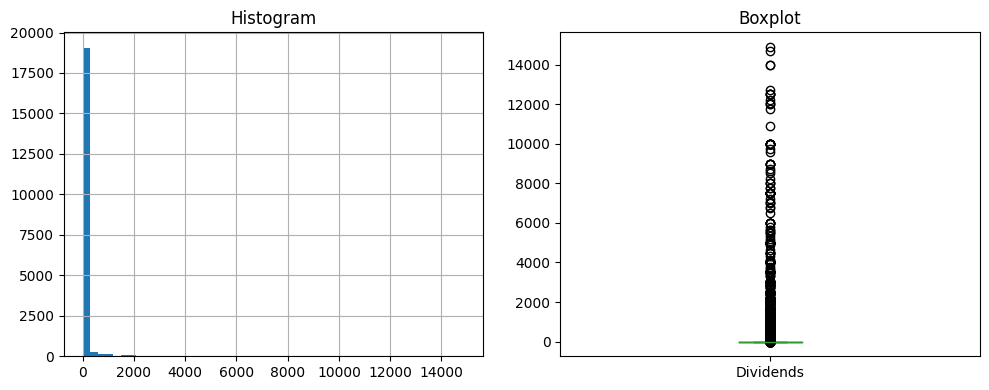

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19941 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      19941 non-null  object
 1   Age                     19941 non-null  int64 
 2   Gender                  19941 non-null  object
 3   Education_Status        19941 non-null  object
 4   Employment_Status       19941 non-null  object
 5   Working_Week (Yearly)   19941 non-null  int64 
 6   Industry_Status         19941 non-null  object
 7   Occupation_Status       19941 non-null  object
 8   Race                    19941 non-null  object
 9   Hispanic_Origin         19941 non-null  object
 10  Martial_Status          19941 non-null  object
 11  Household_Status        19941 non-null  object
 12  Household_Summary       19941 non-null  object
 13  Citizenship             19941 non-null  object
 14  Birth_Country           19941 non-null  object
 15  Birth_C

### 결측값 변환

In [158]:
test['Household_Status'].value_counts()

Household_Status
Householder                                                               3128
Spouse of householder                                                     2418
Child <18 never marr not in subfamily                                     1290
Nonfamily householder                                                     1191
Child 18+ never marr Not in a subfamily                                    910
Secondary individual                                                       415
Other Rel 18+ never marr not in subfamily                                  110
Other Rel 18+ ever marr not in subfamily                                    78
Child 18+ ever marr Not in a subfamily                                      63
Child 18+ ever married Responsible Person of subfamily                      57
Responsible Person of unrelated subfamily                                   38
Grandchild <18 never marr not in subfamily                                  37
Other Relative 18+ spouse of subfam

In [159]:
test['Household_Status'] = test['Household_Status'].fillna('Householder')
# test데이터 결측값이 있기 때문에 해당 컬럼에서 최빈값인 Householder으로 결측값 채움
test.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

### 문자열 변환

In [160]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

In [161]:
from sklearn.preprocessing import LabelEncoder
# train_x와 test_x 변수들을 숫자형으로 인코딩

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_x[i] = train_x[i].astype(str)
    test_x[i] = test_x[i].astype(str)

    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test_x[i] = le.transform(test_x[i])

# 4. 데이터 탐색 및 시각화

In [162]:
train_int.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


### 연속형 변수 EDA

#### AGE

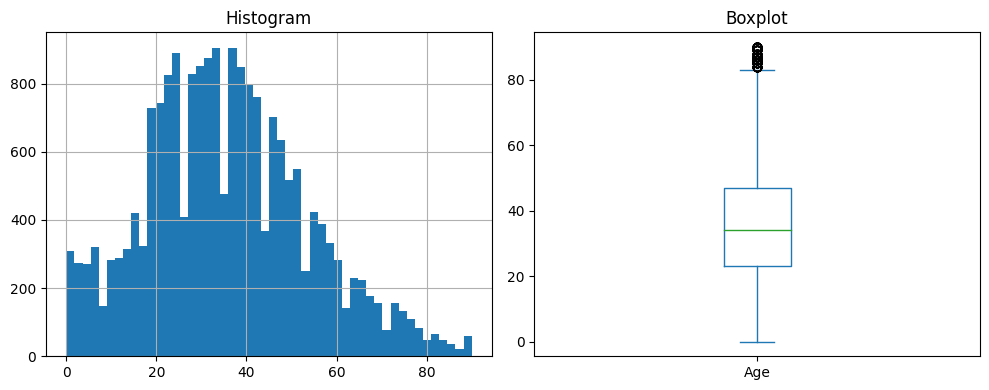

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Age'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Age'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [164]:
# - Age 히스토그램과 박스플롯
# 평균과 중앙값에 큰차이가 없지만 오른쪽이 다소 조금 긴 형태를 띄고 있습니다.
# 박스플랏을 통해서도 큰 이상치는 존재하지 않아 보입니다.

#### Working_Week (Yearly)

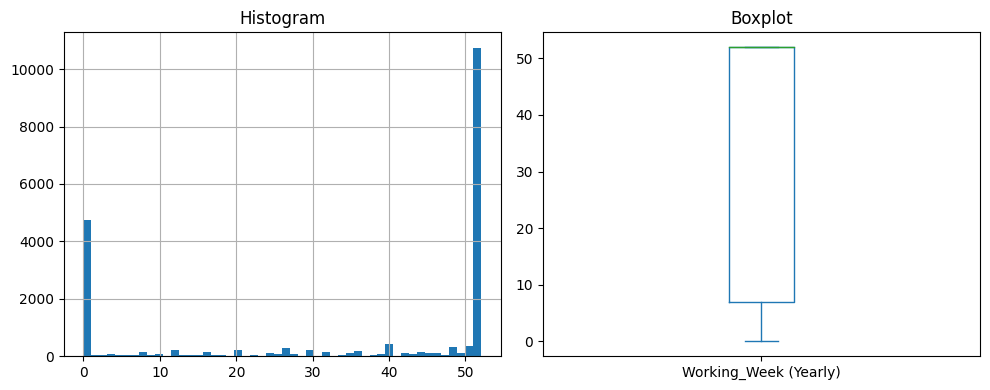

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [166]:
# - Working_Week (Yearly)
# 히스토그램을 통해 분포가 아주 극단적인 것을 확인할 수 있습니다.
# 평균과 중앙값에 차이가 있으며 심지어 최댓값이 중앙값과 일치합니다.
# 이는 평균이나 중앙값이 가진 통계량에 정보가 크리티컬하지 않음을 보여주며 이상치는 없는 것을 확인할 수 있습니다.
# 연속형이지만 히스토그램을 통한 분포는 베르누이분포와 유사하며 이산형으로 전처리가 가능해보입니다.


#### Gains

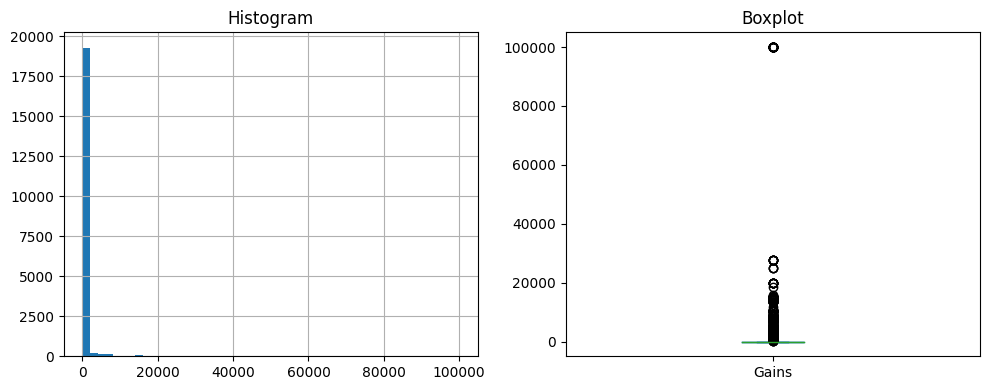

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [168]:
# Gains
# 왼쪽에 극단적으로 쏠려있는 분포입니다.
# 최솟값, 중위값, 평균, 75%분위수 값이 전부 0으로 통일되었고 범주형 변수로 그룹화도 가능해보입니다.
# boxplot을 통해서 이상치가 있음을 알 수 있습니다. 이상치 처리가 필요해보입니다.

#### LOSSES

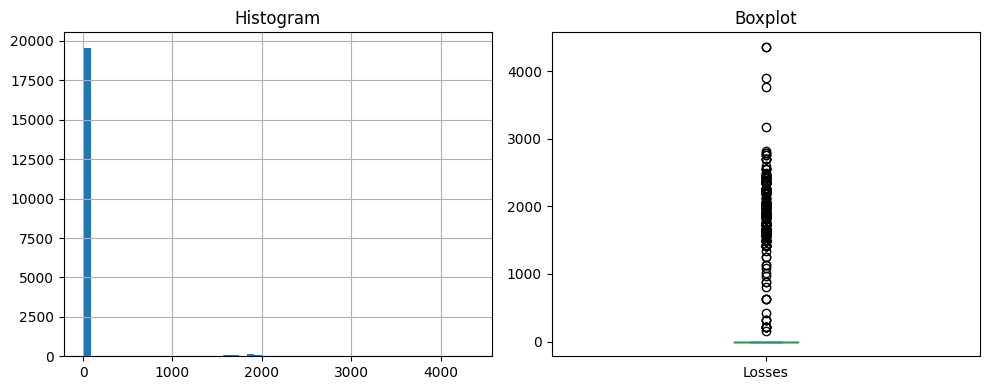

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

# Show the plot
plt.show()

In [170]:
# 마찬가지로 왼쪽에 극단적으로 쏠려 있는 분포입니다.
# 최솟값, 중위값, 평균, 75%분위수 값이 전부 0으로 통일되었고, 범주형 변수로 그룹화도 가능해보입니다.
# 이상치가 존재하지만 삭제에 대한 고려를 해보아야할 것 같습니다.

#### INCOME

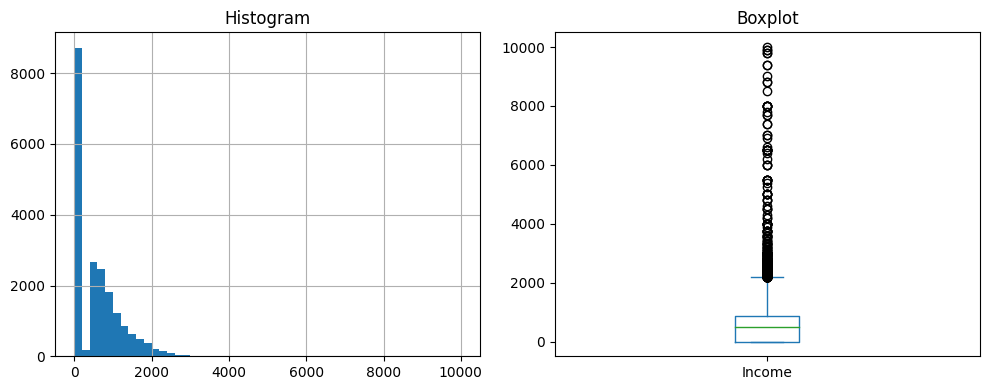

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_int['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_int['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

In [172]:
# 마찬가지로 경제, 금융과 관련된 변수의 분포는 왼쪽에 몰려있는 것을 확인할 수 있습니다.
# 이상치또한 존재하지만, 삭제에 대한 고려가 필요해보입니다.

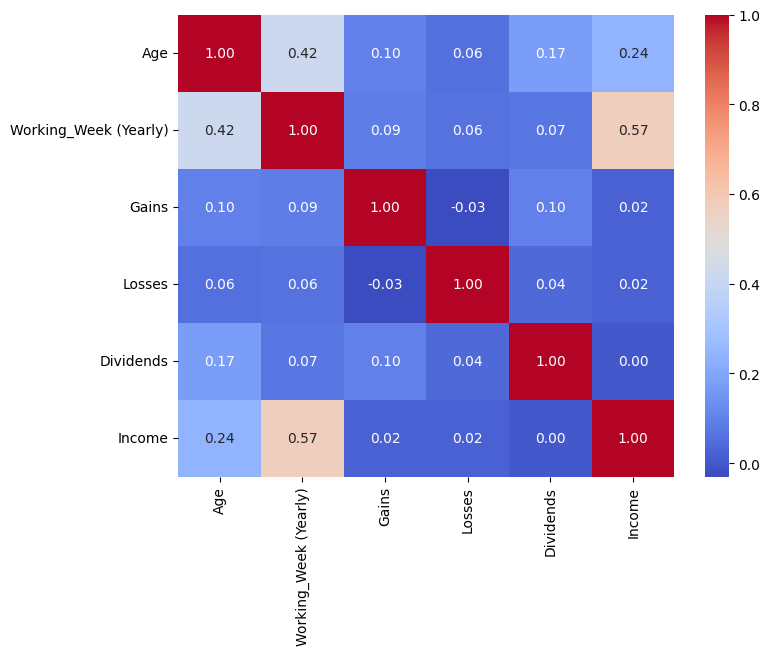

In [173]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(np.log(train_int+1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [174]:
# 소득과 주중근로시간이 양의 상관성이 높게 나왔고,나이와 주중근로시간 또한 높게 나왔습니다.
# 나이가 많아짐에 따라 직장인의 비율이 높아질 것으로 보입니다.
# 따라서 취업 비율이 높아짐에 따라 주중근로시간은 높게 나타날 것이라 생각합니다.
# 나이에 따라 소득또한 어느정도 상관성이 있어보입니다.
